# Проект: Анализ и выявление факторов успеха продаж компьютерных игр в интернет-магазине «Стримчик».

**Описание проекта**

Проект направлен на анализ исторических данных о продажах компьютерных игр, чтобы выявить факторы, определяющие их успешность.

Цель — прогнозировать продажи в будущем, определять потенциально популярные продукты и планировать рекламные кампании.

В проекте мы будем использовать данные о прадажах, оценки пользователей и экспертов, жанры и платформы Интернет-магазина  «Стримчик», который продаёт по всему миру компьютерные игры (games.csv).

Описание данных:
 1. Name — название игры
 2. Platform — платформа
 3. Year_of_Release — год выпуска
 4. Genre — жанр игры
 5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
 6. EU_sales — продажи в Европе (миллионы проданных копий)
 7. JP_sales — продажи в Японии (миллионы проданных копий)
 8. Other_sales — продажи в других странах (миллионы проданных копий)
 9. Critic_Score — оценка критиков (максимум 100)
 10. User_Score — оценка пользователей (максимум 10)
 11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
План работы:
 1. Провести исследовательский анализ данных:
   - Сколько игр выпускалось в разные годы
   - Посмотрим, как менялись продажи по платформам и какие факторы влияли на это
   - Поймем в каких жанрах и скаким рейтингом ESRB продавалось игр больше всего
 2. Провести проверку гипотез:
   - Проверим одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC
   - Проверим разные ли Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)
 3. Сформулировать рекомендации на основе полученных результатов:
   - Определить перспективные платформы и жанры для выпуска новых игр.
   - Разработать рекомендации по рекламной стратегии с учетом региональных особенностей и предпочтений пользователей.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
# Заранее сделаем настройку метода dispaly, чтобы он всегда выводил все столбцы датафрейма
pd.set_option('display.max_columns', None)

## Загрузка и характеристика данных

In [2]:
# Для  начала выведем общую информацию и предоставленных данных
data = pd.read_csv('/datasets/games.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [3]:
# Выведем и посмотрим несколько строк датафрейма с которым мы будем работать
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Проверим данные на пропуски
display(data.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
display(data.isna().mean()*100)

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

**Вывод**

Охарактеризуем предоставленные данные:
1. Размерность - датафрейм состоит из 16715 строк и 11 столбцов
2. Тип данных:
    - User_Score - преобразуем тип object в тип float, т.к. нам потребуется работа с числовыми данными.
    - Critic_Score - преобразуем тип object в тип float, т.к. нам потребуется работа с числовыми данными.
    - Rating - преобразуем тип object в тип category. т.к. данный тип подходит по смыслу, более экономен в памяти, чем текстовые данные, операции с данным типом данных выполняются быстрее.
3. Пропуски в данных:
    - В столбцах Critic_Score, User_Score, Rating средними или медианными значениями заменить нельзя, т.к. величина этих значений не имеет линейную зависимость от каких то других данных, которые нам предоставили, да и величина пропусков настолько большая, что заполннение медианными или средними значениями означает, что у нас будет перекос в сторону этих значений. 
    - Year_of_Release - кол-во невелико, но оставляем пустые не заполненными, т.к. узнать год релиза не представляеися возможным.
    

## Предобработка данных

### Замена названия столбцов. Приведение их к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Преобразование типов данных

Давайте разберемся со значением tbd в столбце с оценкой пользователей.
tbd(to be determined) - используется для обозначения того, что время или место чего-либо еще не определено и будет объявлено позже.
Анализируем мы данные на сегодняшний день, это обознаяение tbd говорит нам о том что занчение по позициям tbd нам не известно.
Поэтому tbd мы просто заменим на NaN

In [7]:
tbd_count = data['user_score'].value_counts()['tbd']
all_user_scores_count = data['user_score'].value_counts().sum()
print(f"Количество строк с 'tbd': {tbd_count} из {all_user_scores_count}")

Количество строк с 'tbd': 2424 из 10014


In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data['rating'] = data['rating'].astype('category')

# Почему мы использовали конструкцию pd.to_numeric(data['year_of_release'], errors='coerce'), 
# а не data['year_of_release'] = data['year_of_release'].astype('float'). дело в том что astype не обрабатывает пустые значения
# следсвие чего выдается ошибка. pd.to_numeric решает эту проблему и все необработанные позиции заменяет на NaN.

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  float64 
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: category(1), float64(7), object(3)
memory usage: 1.3+ MB
None


### Заполнение пропусков

Не заполняем

### Cуммарные продажи во всех регионах

In [9]:
# Создаем новый столбец - суммарные продажи во всех регионах. Назовем его all_country_sales
data['all_country_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# data['all_country_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) еще так можно
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_country_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**Вывод**

В итоге с помощью предобработки мы сделали:
   - привели названия всех столбцов к нижнему регистру;
   - преобразовали в столбцах critic_score, user_score, rating тип данных object в тип данных float;
   - создали новый столбец -  all_country_sales (суммарные продажи во всех регионах).

## Исследовательский анализ данных

### Количество игр выпущенное в разные годы

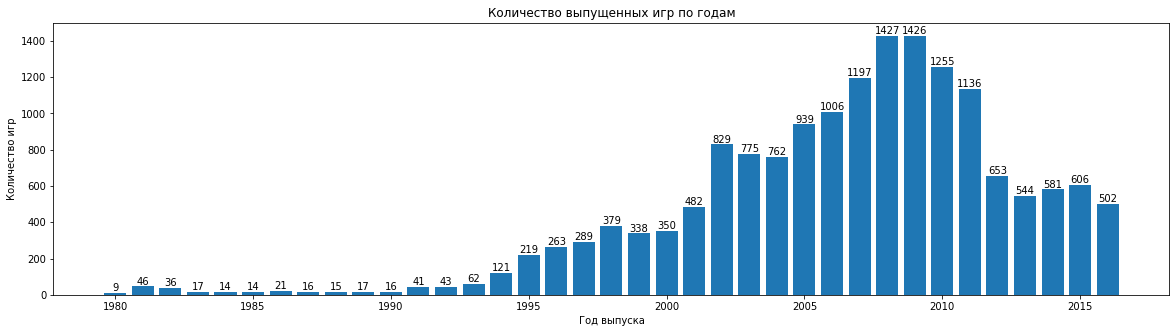

In [10]:
games_per_year = data['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(20, 5))
bars = plt.bar(games_per_year.index, games_per_year.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(int(yval)), ha='center', va='bottom')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Вывод**

Видим что до 1990 года рынок видео игр был статичным и не развивался. Первый период роста - с 1990 по 1995 год, появляются популярные 8 битные приставки, продажи которых завставил расти и рынок игр. С 1995 по 2000 появляется PS. Издание игр вырастает в 3 раза. С 2000 года появляются консоли нового поколения и мы видим взрыной рост выпуска игр. Максимальное количесвто игр было выпущено в 2008 и 2009 годах. С 2009 по 2016 год количество выпускаемых игр уменьшилось в 3 раза.

### Продажи игр в зависимости от платформы

In [11]:
# Т.к. рост выпуска игр начался с 1990 года, будем рассматривать дальше рынка игр с этого года
data_since_1990 = data[data['year_of_release'] >= 1990]

# Выведем суммарные продажи по платформам. Так мы узнаем самые прибыльные из них.
platform_sales_since_1990 = data_since_1990.groupby('platform')['all_country_sales'].sum().sort_values(ascending=False)
print(platform_sales_since_1990)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.69
XB       251.57
N64      218.01
SNES     200.04
GC       196.73
GB       188.03
XOne     159.32
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
NES       27.54
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_country_sales, dtype: float64


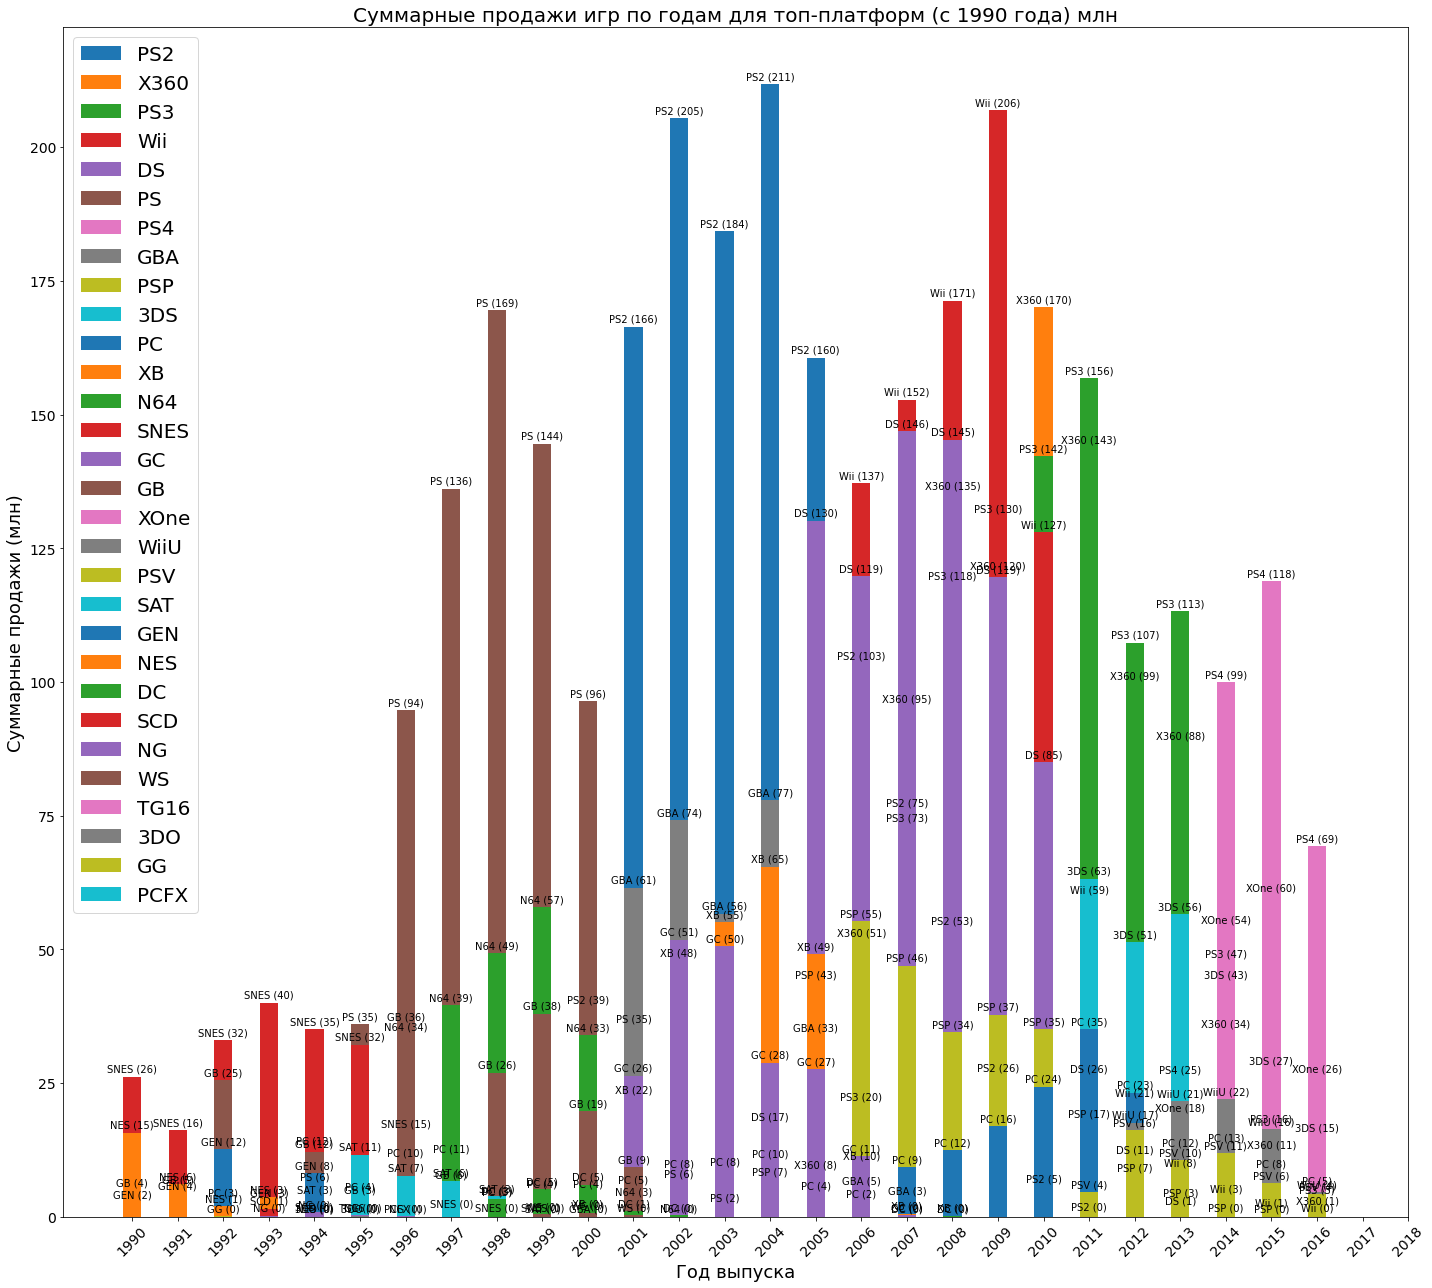

In [12]:
# Построим столбчатую диаграмму с накоплением, чтобы наглядно показать доли продаж каждой платформы относительно друг друга
plt.figure(figsize=(20, 18))

for i, platform in enumerate(platform_sales_since_1990.index):
    platform_data = data_since_1990[data_since_1990['platform'] == platform]
    
    # Группируем по годам и считаем суммарные продажи
    yearly_sales = platform_data.groupby('year_of_release')['all_country_sales'].sum()

    # Создаем массив bottom с правильной длиной
    bottom = np.zeros(len(yearly_sales.index))  

    bars = plt.bar(yearly_sales.index, yearly_sales.values, label=platform, width=0.4, bottom=bottom)

    # Добавляем подписи к барам
    for j, bar in enumerate(bars):
        yval = bar.get_height()
        xval = bar.get_x() + bar.get_width() / 2
        plt.text(xval, yval + bottom[j] + 0.5, f'{platform} ({int(yval)})', ha='center', va='bottom')

    bottom += yearly_sales.values

plt.title('Суммарные продажи игр по годам для топ-платформ (с 1990 года) млн', fontsize=20)
plt.xlabel('Год выпуска', fontsize=18)
plt.ylabel('Суммарные продажи (млн)', fontsize=18)
plt.yticks(fontsize=14)

years = range(1990, 2019)
plt.xticks(years, years, rotation=45, fontsize=14)

plt.legend(prop={'size': 20})
plt.tight_layout()
plt.show()

**Вывод**

Из полученной диаграммы видим, что с 1996 по 2010 года срок жизни и активный рост продаж игр платформы в среднем 5 лет. С 2010 и далее это 3 года. Также уже с учетом этой диаграммы мы можем уточнить актуальный период для нашего исследования. Также тенденции в жанрах игр 10 лет назад и на текущий момент могли сильно измениться.

Для начала определим актальный период выборки.  В бизнесе обычно берут период не больше 2-3 лет, чтобы не анализироват отжившие тренды. На диагрмме выше можно отчетливо увидеть последний сложившийся тренд - это появление новых поколений платформ PS4, XOne, WiiU на рынке, который как раз сложился последние три года.   

Также имеем информацию, что в 2016 году данные могут быть не полные. По диаграмме видно что продаж меньше чем за предыдущий год, но распределение значений по продаж похоже и нам важно учитывать как можно более свежие тенденции, поэтому также будем учитывать данные за 2016 год.

Принимая во внимание все обозначеные факторы, мы берем в качестве актуального период с 2014 по 2016 годы.

In [13]:
# Создаем датафрейм с данными за актуальный период
actual_period_data = data[data['year_of_release'] >= 2014]
display(actual_period_data.head(5))
print(actual_period_data['year_of_release'].unique())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_country_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


[2015. 2014. 2016.]


Дальше нам необходимо определиться с выборкой платформ. Платформ много, но нам нужны самые прибыльные.
Поэтому выведем топ 10 платформ с самыми высоким продажами за выбранные период и на основе полученных данных примем решение какие из платформ мы включим в наше исследование.

In [14]:
# Выведем топ 10 суммарные продажи по платформам.
platform_sales_since_2014 = actual_period_data.groupby('platform')['all_country_sales'].sum().sort_values(ascending=False)[:10]
print(platform_sales_since_2014)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: all_country_sales, dtype: float64


Возьмем 6 первых позиций. Большая выборка усложнит наш анализ, а меньшая не даст нам нужного разнообразия (виды консолей: портативные, обычные, с сенсорным оборудованием / предыдущее поколение, новое поколение)

In [15]:
# Создаем датафрейм с самыми продаваемыми платформами
platforms_array = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']
actual_period_data = actual_period_data[actual_period_data['platform'].isin(platforms_array)]
actual_period_data.info()
display(actual_period_data.head(5))
print(actual_period_data['platform'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 31 to 16710
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               1219 non-null   object  
 1   platform           1219 non-null   object  
 2   year_of_release    1219 non-null   float64 
 3   genre              1219 non-null   object  
 4   na_sales           1219 non-null   float64 
 5   eu_sales           1219 non-null   float64 
 6   jp_sales           1219 non-null   float64 
 7   other_sales        1219 non-null   float64 
 8   critic_score       548 non-null    float64 
 9   user_score         691 non-null    float64 
 10  rating             740 non-null    category
 11  all_country_sales  1219 non-null   float64 
dtypes: category(1), float64(8), object(3)
memory usage: 115.8+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_country_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'X360']


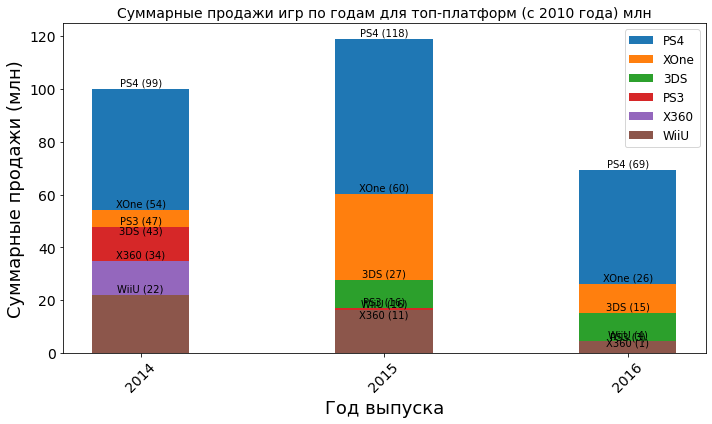

In [16]:
# Построим столбчатую диаграмму с накоплением
platform_sales = actual_period_data.groupby('platform')['all_country_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))

for i, platform in enumerate(platform_sales.index):
    platform_data = actual_period_data[actual_period_data['platform'] == platform]
    
    # Группируем по годам и считаем суммарные продажи
    yearly_sales = platform_data.groupby('year_of_release')['all_country_sales'].sum()

    # Создаем массив bottom с правильной длиной
    bottom = np.zeros(len(yearly_sales.index))

    bars = plt.bar(yearly_sales.index, yearly_sales.values, label=platform, width=0.4, bottom=bottom)

    # Добавляем подписи к барам
    for j, bar in enumerate(bars):
        yval = bar.get_height()
        xval = bar.get_x() + bar.get_width() / 2
        plt.text(xval, yval + bottom[j] + 0.5, f'{platform} ({int(yval)})', ha='center', va='bottom')

    # Обновляем bottom только для тех годов, где есть данные
    bottom = np.array([bottom[j] + yearly_sales.values[j] if j < len(yearly_sales.values) else bottom[j] for j in range(len(bottom))])

plt.title('Суммарные продажи игр по годам для топ-платформ (с 2010 года) млн', fontsize=14)
plt.xlabel('Год выпуска', fontsize=18)
plt.ylabel('Суммарные продажи (млн)', fontsize=18)
plt.yticks(fontsize=14)

years = range(2014, 2017)  # Изменили диапазон годов
plt.xticks(years, years, rotation=45, fontsize=14)

plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()

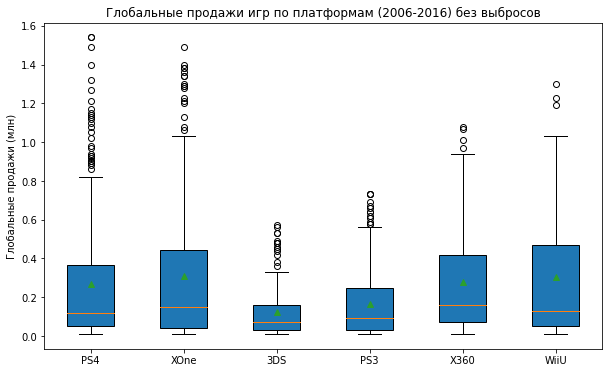

In [17]:
# Построим график ящик с усами по глобальным продажам игр в разбивке по платформам.
platforms_array = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']

# Сгруппируем данные по платформам для ящика с усами
platform_data = []
for platform in platforms_array:
    platform_sales = actual_period_data[actual_period_data['platform'] == platform]['all_country_sales']
    
    # Исключим выбросы
    Q1 = np.percentile(platform_sales, 25)
    Q3 = np.percentile(platform_sales, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    platform_sales = platform_sales[(platform_sales >= lower_bound) & (platform_sales <= upper_bound)]
    
    platform_data.append(platform_sales)

# Построим график "ящик с усами"
plt.figure(figsize=(10, 6))
plt.boxplot(platform_data, 
            labels=platforms_array, 
            patch_artist=True, 
            showmeans=True)  # showmeans=True покажет среднее

plt.title('Глобальные продажи игр по платформам (2006-2016) без выбросов')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

In [18]:
# Выведем получившиеся значения ящиков с усами
for i, platform in enumerate(platforms_array):
    dt = platform_data[i]
    print(f"Платформа: {platform}")
    print(f"Минимум: {dt.min()}")
    print(f"Максимум: {dt.max()}")
    print(f"Первый квартиль (Q1): {np.percentile(dt, 25)}")
    print(f"Медиана: {np.median(dt)}")
    print(f"Третий квартиль (Q3): {np.percentile(dt, 75)}")
    print(f"Среднее: {np.mean(dt)}")
    print("--------------------")

plt.show()

Платформа: PS4
Минимум: 0.01
Максимум: 1.54
Первый квартиль (Q1): 0.05
Медиана: 0.12000000000000001
Третий квартиль (Q3): 0.365
Среднее: 0.26938080495356037
--------------------
Платформа: XOne
Минимум: 0.01
Максимум: 1.4900000000000002
Первый квартиль (Q1): 0.04
Медиана: 0.15000000000000002
Третий квартиль (Q3): 0.445
Среднее: 0.30935960591133005
--------------------
Платформа: 3DS
Минимум: 0.01
Максимум: 0.5700000000000001
Первый квартиль (Q1): 0.03
Медиана: 0.07
Третий квартиль (Q3): 0.16
Среднее: 0.1217837837837838
--------------------
Платформа: PS3
Минимум: 0.01
Максимум: 0.7300000000000001
Первый квартиль (Q1): 0.03
Медиана: 0.09
Третий квартиль (Q3): 0.245
Среднее: 0.16376884422110555
--------------------
Платформа: X360
Минимум: 0.01
Максимум: 1.08
Первый квартиль (Q1): 0.06999999999999999
Медиана: 0.16
Третий квартиль (Q3): 0.42
Среднее: 0.2799009900990099
--------------------
Платформа: WiiU
Минимум: 0.01
Максимум: 1.3
Первый квартиль (Q1): 0.05
Медиана: 0.13
Третий квартиль

Описание результата:

   - У всех платформдовольно низкие средние значения, это говорит нам, что в данный период больштнство игр с низкими продажами.
   - Платформы PS4 и XOne имеют более широкий диапазон продаж (от 0.01 до 1.54 млн. долларов) и более высокие средние значения, чем другие, заимключением WiiU. Это указывает на то, что на этих платформах выпускалось больше игр с высокими продажами.
   -  WiiU Среднее значение продаж WiiU (0.302 млн. долларов) находится на уровне PS4 и XOne, что говорит о том, что платформа способна генерировать значительные продажи, несмотря на небольшие суммарные продажи по сравнени. с другими платформами.
   - 3DS имеет самый узкий диапазон продаж (от 0.01 до 0.57 млн. долларов) и самое низкое среднее значение продаж. Это говорит нам, что на этой платформе выпускалось меньше всего игр с высокими продажами.

#### Влияние отзывов на продажи (для PS4)

<Figure size 720x432 with 0 Axes>

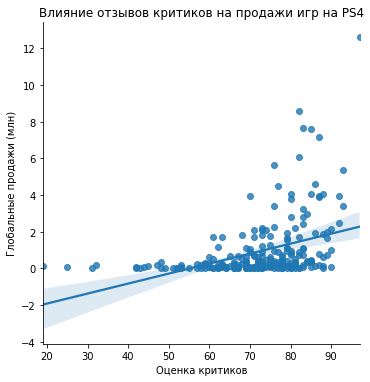

Коэффициент корреляции Пирсона: 0.40266141068104083


<Figure size 720x432 with 0 Axes>

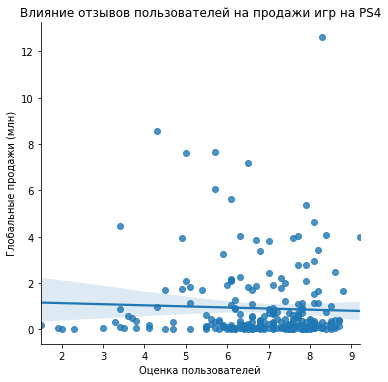

Коэффициент корреляции Пирсона: -0.040131589472697356


In [19]:
# Выбираем популярную платформу в последние годы PS4
platform = 'PS4'
PS4_data = actual_period_data[actual_period_data['platform'] == platform]

# Строим диаграмму рассеяния
plt.figure(figsize=(10, 6))
sns.lmplot(x='critic_score', y='all_country_sales', data=PS4_data)
plt.title(f'Влияние отзывов критиков на продажи игр на {platform}')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

# Вычисляем коэффициент корреляции Пирсона - это статистический показатель, 
# который измеряет степень линейной зависимости между двумя переменными
correlation_critic_score = PS4_data['critic_score'].corr(PS4_data['all_country_sales'])
print(f'Коэффициент корреляции Пирсона: {correlation_critic_score}')

plt.figure(figsize=(10, 6))
sns.lmplot(x='user_score', y='all_country_sales', data=PS4_data)
plt.title(f'Влияние отзывов пользователей на продажи игр на {platform}')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

correlation_user_score = PS4_data['user_score'].corr(PS4_data['all_country_sales'])
print(f'Коэффициент корреляции Пирсона: {correlation_user_score}')

**Вывод**

Отзывы критиков имеют среднее положительное влияние на продажи игр на PS4, этот фактор не является единственным определяющим фактором.

Отношение между отзывами пользователей и продажами очень слабое. Это означает, что отзывы пользователей практически не влияют на продажи игр на PS4.

### Влияние отзывов на продажи для остальных платформ

In [20]:
platforms = ['PS3', 'X360', 'Wii', '3DS', 'XOne']

for platform in platforms:
    platform_data = actual_period_data[actual_period_data['platform'] == platform]
    correlation_critic_score = platform_data['critic_score'].corr(platform_data['all_country_sales'])
    correlation_user_score = platform_data['user_score'].corr(platform_data['all_country_sales'])
    
    print(f"Платформа: {platform}")
    print(f"Коэффициент корреляции Пирсона для оценок критиков: {correlation_critic_score}")
    print(f"Коэффициент корреляции Пирсона для оценок пользователей: {correlation_user_score}")
    print("--------------------")

Платформа: PS3
Коэффициент корреляции Пирсона для оценок критиков: 0.44657460493190704
Коэффициент корреляции Пирсона для оценок пользователей: -0.16676141347662118
--------------------
Платформа: X360
Коэффициент корреляции Пирсона для оценок критиков: 0.5257228356581523
Коэффициент корреляции Пирсона для оценок пользователей: -0.138444570945665
--------------------
Платформа: Wii
Коэффициент корреляции Пирсона для оценок критиков: nan
Коэффициент корреляции Пирсона для оценок пользователей: nan
--------------------
Платформа: 3DS
Коэффициент корреляции Пирсона для оценок критиков: 0.314117492869051
Коэффициент корреляции Пирсона для оценок пользователей: 0.2151932718527028
--------------------
Платформа: XOne
Коэффициент корреляции Пирсона для оценок критиков: 0.42867694370333226
Коэффициент корреляции Пирсона для оценок пользователей: -0.0703839280647581
--------------------


**Вывод**

Ситуация по остальным платформам похожая. Для всех платформ наблюдаем среднюю (от 0.3 до 0.5) положительную корреляцию между оценками критиков и продажами игр. Это означает, что игры с более высокими оценками критиков, имеют немного лучшие продажи, чем игры с низкими оценками. Корреляция между оценками пользователей и продажами либо слабая (близкая к нулю), либо практически отсутствует. Это указывает на то, что отзывы пользователей не являются сильным фактором, влияющим на продажи.

### Распределение игр по жанрам

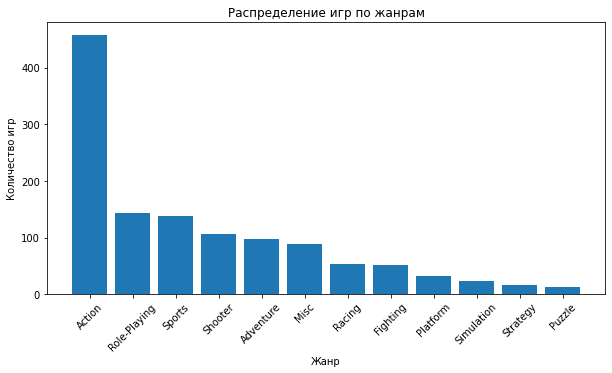

genre
Action          185.16
Shooter         164.51
Sports          106.70
Role-Playing     90.47
Misc             30.91
Fighting         27.43
Racing           26.78
Platform         17.84
Adventure        14.64
Simulation        6.49
Puzzle            2.15
Strategy          1.49
Name: all_country_sales, dtype: float64


In [21]:
# Расчет количества игр по жанрам
genre_count = actual_period_data['genre'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(genre_count.index, genre_count.values)
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()

# Группируем по жанрам и считаем суммарные продажи
genre_sales = actual_period_data.groupby('genre')['all_country_sales'].sum().sort_values(ascending=False)
print(genre_sales)

Продажи Action больше из-за того, что самих игр в данном жанре выпускается больше. Но прибыль на одну игру может быть меньше, чем у игры другого жанра.

Чтобы понять какой жанр приносит больше прибыли надо выяснить средние продажи одной игры в каждом жанре. Для этого нам нужно разделить суммарные продажи на количество выпущенных игр.

In [22]:
genres_profit = genre_sales / genre_count
genres_profit = genres_profit.sort_values(ascending=False)
print(genres_profit)

Shooter         1.551981
Sports          0.773188
Role-Playing    0.628264
Platform        0.540606
Fighting        0.537843
Racing          0.505283
Action          0.405164
Misc            0.351250
Simulation      0.282174
Puzzle          0.179167
Adventure       0.149388
Strategy        0.093125
dtype: float64


**Вывод**

Больше всего выпускается игр в жанре Action. Самые продаваемые жанры: Action, Role-Playing и Sports . Жанры с низкими продажами: Strategy, Puzzle, Simulation.

Но анализируя средние продажи одной игры, мы видим, что самые прибыльные жанр - это Shooter (средние продажи на игру 1.55 миллиона долларов. Продажи игр этого жанра почти вдое превосходя средние показатели игр других жанров. На втором месте Sports(0.77), на третьем Role-Playing (0.63). В то же время игры жанров Puzzle (0.18), Adventure (0.15) и Strategy (0.09) приносят меньше всего прибыли.

Учитывая высокую прибыльность жанра Shooter, можно рассмотреть возможность увеличения вложений в продвижение и маркетинг игр этого жанра, а также в игры жанров Sports и Role-Playing.
Игры жанров Puzzle, Adventure и Strategy приносят меньше всего прибыли, поэтому можно рассмотреть возможность уменьшения или вообще сокращения вложений в игры данных жанров.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [23]:
regions = ['na', 'eu', 'jp']

for region in regions:
    print(f"Пользователи региона {region}")

    # Самые популярные платформы по продажам
    region_data = actual_period_data[actual_period_data[f'{region}_sales'] > 0]
    platform_sales = region_data.groupby('platform')[f'{region}_sales'].sum().sort_values(ascending=False)
    top_platforms = platform_sales.head(5)
    print("Самые популярные платформы по продажам:")
    print(top_platforms)

    # Процент продаж по платформам
    total_sales = platform_sales.sum()
    platform_rercents = (platform_sales / total_sales) * 100
    print("\n Процент продаж по платформам:")
    print(platform_rercents.head(5))

    print("------------------------------")

Пользователи региона na
Самые популярные платформы по продажам:
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

 Процент продаж по платформам:
platform
PS4     36.223047
XOne    29.853433
X360    10.395621
3DS      8.316497
PS3      8.099769
Name: na_sales, dtype: float64
------------------------------
Пользователи региона eu
Самые популярные платформы по продажам:
platform
PS4     130.04
XOne     46.25
PS3      25.54
3DS      16.12
X360     15.49
Name: eu_sales, dtype: float64

 Процент продаж по платформам:
platform
PS4     52.735310
XOne    18.755830
PS3     10.357273
3DS      6.537167
X360     6.281682
Name: eu_sales, dtype: float64
------------------------------
Пользователи региона jp
Самые популярные платформы по продажам:
platform
3DS     44.24
PS4     15.02
PS3     11.22
WiiU     7.31
XOne     0.32
Name: jp_sales, dtype: float64

 Процент продаж по платформам:
platform
3DS     56.580125
PS4     19.209618
PS3     14

**Вывод**

В Северной Америке и Европе преобладают платформы PS4 и XOne. Причем в Европе PS4 доминирует, составляя более половины продаж. Это может говорить о том, что в этих регионах игроки предпочитают игровой опыт на больших экранах с более мощными устройствами.

В Японии доминирует над остальными платформами 3DS и составляет 56% от всех продаж на рынке, что говорит о любви японских пользователей к портативным консолям.

### Самые популярные жанры (топ-5)

In [24]:
for region in regions:
    print(f"Пользователи региона {region}")

    # Самые популярные жанры по продажам
    region_data = actual_period_data[actual_period_data[f'{region}_sales'] > 0]
    genre_sales = region_data.groupby('genre')[f'{region}_sales'].sum().sort_values(ascending=False)
    top_genres = genre_sales.head(5)
    print("Самые популярные жанры по продажам:")
    print(top_genres)

    # Процент продаж по жанрам
    total_sales = genre_sales.sum()
    genre_percents = (genre_sales / total_sales) * 100
    print("\nПроцент продаж по жанрам:")
    print(genre_percents.head(5))
        
    print("------------------------------")

Пользователи региона na
Самые популярные жанры по продажам:
genre
Shooter         76.83
Action          69.83
Sports          45.71
Role-Playing    31.14
Misc            13.15
Name: na_sales, dtype: float64

Процент продаж по жанрам:
genre
Shooter         28.222459
Action          25.651104
Sports          16.790949
Role-Playing    11.438857
Misc             4.830474
Name: na_sales, dtype: float64
------------------------------
Пользователи региона eu
Самые популярные жанры по продажам:
genre
Action          69.32
Shooter         61.87
Sports          44.17
Role-Playing    24.91
Racing          13.51
Name: eu_sales, dtype: float64

Процент продаж по жанрам:
genre
Action          28.111440
Shooter         25.090231
Sports          17.912324
Role-Playing    10.101788
Racing           5.478730
Name: eu_sales, dtype: float64
------------------------------
Пользователи региона jp
Самые популярные жанры по продажам:
genre
Role-Playing    26.47
Action          24.48
Fighting         5.91
Shoo

**Вывод**

В Северной Америке (NA) и Европе (EU) схожие предпочтения, Action и Shooter: Эти жанры являются наиболее популярными жанрами в обоих регионах, составляя более половины продаж. Спортивные игры также занимают значительную долю продаж, что говорит о популярности спортивных симуляторов в обоих регионах. Ролевые игры менее популярны, чем в Японии, но все же имеют значительную долю рынка.

Япония (JP) отличается значительной популярностью ролевые игры (Role-Playing). Это может быть связано с традициями японской игровой индустрии, где ролевые игры всегда занимают важное место.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для начала объясним значения рейтинга ESRB:
   - «EC» («Early childhood») — «Для детей младшего возраста»
   - «E» («Everyone») — «Для всех»
   - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
   - «T» («Teen») — «Подросткам»
   - «M» («Mature») — «Для взрослых»
   - «AO» («Adults Only 18+») — «Только для взрослых»
   - «RP» («Rating Pending») — «Рейтинг ожидается»
   - «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

In [25]:
for region in regions:
    print(f"Пользователи региона {region}")

    # Влияние рейтинга ESRB
    region_data = actual_period_data[actual_period_data[f'{region}_sales'] > 0]
    esrb_sales = region_data.groupby('rating')[f'{region}_sales'].sum().sort_values(ascending=False)
    print("Влияние рейтинга ESRB:")
    print(esrb_sales)

    print("------------------------------")

Пользователи региона na
Влияние рейтинга ESRB:
rating
M       91.25
E       50.28
T       36.05
E10+    30.80
AO       0.00
EC       0.00
K-A      0.00
RP       0.00
Name: na_sales, dtype: float64
------------------------------
Пользователи региона eu
Влияние рейтинга ESRB:
rating
M       85.40
E       55.05
T       29.21
E10+    22.22
AO       0.00
EC       0.00
K-A      0.00
RP       0.00
Name: eu_sales, dtype: float64
------------------------------
Пользователи региона jp
Влияние рейтинга ESRB:
rating
T       10.73
E        8.89
M        7.21
E10+     4.18
AO       0.00
EC       0.00
K-A      0.00
RP       0.00
Name: jp_sales, dtype: float64
------------------------------


**Вывод**

Самые продаваемые игры  во всех регионах с рейтингом E, M, T и E10+

Cамые большие продажи в Северной америке и Европе имеют игры с рейтингом М (для взрослых) - это игры рекомендуемые возрасту +18, где присутствуют сцены насилия и сцены сексуального характера.

Низкий спрос на “EC”, “AO” и “K-A”. Игры с этим ретингм практически не продаются.

Существуют различия в предпочтениях пользователей из Европы и Северной америки и японскими пользователями. Например, в Японии более популярны игры с рейтингом “T”, чем в других регионах.

## Проверка гипотез

### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Создадим два датафрейма с рейтингами по платформам XOne и PC и проверим одностороннюю гипотезу о равенстве двух средних генеральных совокупностей.
В данном случае нулевая и альтернативная гипотезы выглядят так:
 - Нулевая гипотеза: средние пользовательские рейтинги платформ XOne и PC одинаковые.
 - Альтернативная гипотеза: средние пользовательские рейтинги платформ XOne и PC отличаются.

Уровень значимости (alpha) в статистических тестах - это порог, который мы устанавливаем для принятия решения о том, отвергать ли нулевую гипотезу или нет.

Что он означает:

alpha = 0.05 означает, что мы готовы принять риск ошибиться в 5% случаев, отвергая нулевую гипотезу, когда она на самом деле верна.
Другими словами, мы готовы принять 5% вероятность ошибочно отвергнуть нулевую гипотезу (т.е. сделать ошибку первого рода).
Почему он такой (0.05)?

Исторически сложившийся стандарт: 0.05 — это традиционный уровень значимости, который широко используется в статистике.
Компромисс между точностью и риском: С одной стороны, мы хотим минимизировать риск ошибочно отвергнуть нулевую гипотезу. 
С другой стороны, мы не хотим слишком сильно завышать риск ошибки второго рода (не отвергнуть нулевую гипотезу, 
когда она на самом деле неверна).
0.05 представляет собой разумный компромисс между этими двумя факторами.

Теперь нужно разобраться походит ли нам уровень значимости 0.05. Обычно уровень значимости имеет значения от 0.01 (выборка 100-1000 позиций) до 0.1 (до 100). Чем меньше выборка, тем выше уровень значимости.

Факторы, влияющие на выбор уровня значимости:
Первое и, возможно, самое очевидное – это цели и специфика проекта. От того, насколько критичными могут быть последствия ошибки, зависит, насколько консервативным или агрессивным вы можете быть в выборе α.

Статистическая мощность. Выбор слишком низкого α может привести к снижению мощности теста, что увеличивает риск ошибки второго рода – не обнаружить реальное различие, когда оно существует.

Размер выборки напрямую влияет на статистические выводы. С большей выборкой больше шансов обнаружить реальное различие, если оно существует. Это может позволить выбрать более строгий уровень значимости без ущерба для статистической мощности.

Разница между выборками: Если различие между выборками большое, то уровень значимости может быть ниже, потому что вы с большей вероятностью откроете статистически значимое различие.

Дисперсия данных: Чем больше дисперсия данных в выборках, тем больше размер выборки нужен для получения статистически значимых результатов.

Рассмотрим выборки для проверки гипотезы 

In [26]:
# Создаем датафрейм с актуальным периодом, но который включает все платформы
actual_period_data_all_platforms = data[data['year_of_release'] >= 2014]

# Создаем новые датафреймы для проверки гипотезы
xone_data = actual_period_data_all_platforms[actual_period_data_all_platforms['platform'] == 'XOne']['user_score'].dropna()
pc_data = actual_period_data_all_platforms[actual_period_data_all_platforms['platform'] == 'PC']['user_score'].dropna()

In [27]:
xone_data.describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [28]:
pc_data.describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Видим, что выборки имеют средний размер, высокой дисперсии не просматривается. Задаём уровень значимости 0.05. После вывода результата, можно также посмотреть измениться ли результат, при уровнях значимости 0.01 и 0.1.

In [29]:
# # Создаем датафрейм с актуальным периодом, но который включает все платформы
# actual_period_data_all_platforms = data[data['year_of_release'] >= 2014]

# # Создаем новые датафреймы для проверки гипотезы
# xone_data = actual_period_data_all_platforms[actual_period_data_all_platforms['platform'] == 'XOne']['user_score'].dropna()
# pc_data = actual_period_data_all_platforms[actual_period_data_all_platforms['platform'] == 'PC']['user_score'].dropna()

# Задаём уровень значимости
alpha = 0.05

# Проверка гипотезы
t_statistic, p_value = st.ttest_ind(xone_data, pc_data, equal_var=False, alternative='two-sided')

# Вывод результата
print("Гипотеза: Средние пользовательские рейтинги платформ XOne и PC одинаковые")
print(f"t-статистика: {t_statistic:.2f}")
print(f"p-значение: {p_value:.3f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги XOne и PC отличаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги XOne и PC могут быть одинаковыми.")


Гипотеза: Средние пользовательские рейтинги платформ XOne и PC одинаковые
t-статистика: 1.58
p-значение: 0.116
Не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги XOne и PC могут быть одинаковыми.


**Вывод**

Значение t-статистика небольшое (1.58). Это означает, что что различие между средними значениями Xbox One и PC небольшое.

p-значение (0.116) выше уровня значимости. Это означает, что средние пользовательские рейтинги XOne и PC могут быть одинаковыми.

В данном случае изменение уровня значимости на результат никак не повлияет.

### Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Создадим два датафрейма с рейтингами по жанрам Action И Sports и проверим одностороннюю гипотезу о равенстве двух средних генеральных совокупностей.
В данном случае нулевая и альтернативная гипотезы выглядят так:
 - Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports одинаковые.
 - Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports отличаются.

In [30]:
# Создаем новые датафреймы для проверки гипотезы
action_data = actual_period_data_all_platforms[actual_period_data_all_platforms['genre'] == 'Action']['user_score'].dropna()
sports_data = actual_period_data_all_platforms[actual_period_data_all_platforms['genre'] == 'Sports']['user_score'].dropna()

In [31]:
action_data.describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [32]:
sports_data.describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

Для проверки гипотезы ьакже подходит уровень значимости 0.05.

In [33]:
# # Создаем новые датафреймы для проверки гипотезы
# action_data = actual_period_data_all_platforms[actual_period_data_all_platforms['genre'] == 'Action']['user_score'].dropna()
# sports_data = actual_period_data_all_platforms[actual_period_data_all_platforms['genre'] == 'Sports']['user_score'].dropna()

# Задаём уровень значимости
alpha = 0.05

# Проверка гипотезы
t_statistic, p_value = st.ttest_ind(action_data, sports_data, equal_var=False)

# Вывод результата
print("Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные")
print(f"t-статистика: {t_statistic:.2f}")
print(f"p-значение: {p_value:.3f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги Action и Sports отличаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги Action и Sports могут быть одинаковыми.")

Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные
t-статистика: 8.38
p-значение: 0.000
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги Action и Sports отличаются.


**Вывод**

Значение t-статистика (8.38) значительно отличается от нуля. Это означает, что разница между средними пользовательскими рейтингами Action и Sports довольно значительна.

p-значение (0.000) очень маленькое. Это означает, что мы наблюдаем данные, которые очень маловероятно получить, если нулевая гипотеза верна, а следовательно средние пользовательские рейтинги Action и Sports отличаются.

В данном случае изменение уровня значимости на результат никак не повлияет.

## Общий вывод

**Проект: Анализ и выявление факторов успеха продаж компьютерных игр в интернет-магазине «Стримчик».**

### Описание проекта
Проект направлен на анализ исторических данных о продажах компьютерных игр, чтобы выявить факторы, определяющие их успешность.

### Цель проекта
Цель — прогнозировать продажи в будущем, определять потенциально популярные продукты и планировать рекламные кампании.

### Предобработка данных
На первом этапе нашего исследования была проведена предобработка данных:
   - привели названия всех столбцов к нижнему регистру;
   - преобразовали в столбцах critic_score, user_score, rating тип данных object в тип данных float;
   - создали новый столбец -  all_country_sales (суммарные продажи во всех регионах).
   
### Исследовательский анализ
Анализ показал, что рынок видеоигр претерпел значительные изменения за последние 15 лет. Период с 2014 по 2016 год наиболее подходящим для исследования, так как именно в этот период наблюдается смена тренда, максимальная прибыль от продажи игр переходит к консолям нового поколения.

**Проведенный исследовательский анализ позволил нам сделать следующие выводы:**

 - Срок жизни платформ сократился: С 1996 по 2010 год средний срок жизни платформы составлял 5 лет, после 2010 года - 3 года.
 - Платформы PS4, XOne выделяются как наиболее прибыльные платформы, демонстрируя широкий диапазон продаж и высокие средние значения. PS4 является самой перспективной в ближайшие годы, т.к. имеет самые высокие продажи за последние 3 года.
 - WiiU и 3DS: WiiU демонстрирует более стабильные продажи, но без явных хитов. 3DS, наоборот, имеет самый узкий диапазон продаж и низкие средние показатели, что указывает на меньшее количество высоко продаваемых игр на этой платформе.

**Влияние оценок критиков и пользователей на продажи:**
 - Отзывы критиков имеют среднее положительное влияние на продажи игр, но не являются основным фактором.
 - Отзывы пользователей практически не влияют на продажи игр, корреляция между оценками пользователей и продажами слабая или отсутствует.

**Влияние жанров на продажи:**
 - Больше всего выпускается игр в жанре Action. Самые продаваемые жанры: Action, Role-Playing и Sports . Жанры с низкими продажами: Strategy, Puzzle, Simulation.
 - Shooter является самым прибыльным жанром с средними продажами на игру 1.55 миллиона долларов. Продажи игр этого жанра почти вдвое превосходят средние показатели игр других жанров. На втором месте Sports (0.77 миллиона долларов), на третьем Role-Playing (0,63 миллиона долларов). Игры жанров Puzzle (0.18 миллиона долларов), Adventure (0.15 миллиона долларов) и Strategy (0.09 миллиона долларов) приносят меньше всего прибыли.
 
 
### Портрет пользователя по регионам
**Северная Америка (NA) и Европа (EU):**

Предпочтения в платформах: PS4, XOne.
Предпочтения в жанрах: Action, Sports, Shooter.
Предпочтения в рейтингах: M (для взрослых), E (для всех), T (подростковый), E10+.
Профиль пользователя: Игрок, предпочитающий игровой опыт на больших экранах с более мощными устройствами. Увлекается спортивными симуляторами, шутерами. Обычно старше 18 лет.


**Япония (JP):**

Предпочтения в платформах: 3DS, PS4.
Предпочтения в жанрах: Role-Playing.
Предпочтения в рейтингах: T (подростковый), E (для всех).
Профиль пользователя: Игрок, предпочитающий портативные консоли. Увлекается ролевыми играми. Может быть как взрослым, так и подростком.

### Проверка гипотез
**Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:**

 - Нулевая гипотеза: средние пользовательские рейтинги платформ XOne и PC одинаковые.
 - Альтернативная гипотеза: средние пользовательские рейтинги платформ XOne и PC отличаются.
 
 
 *Результат проверки:*
 
Значение t-статистика небольшое (1.58). Это означает, что что различие между средними значениями Xbox One и PC небольшое. 
p-значение (0.116) выше уровня значимости. Это означает, что средние пользовательские рейтинги XOne и PC могут быть одинаковыми.
 
 
**Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:**

 - Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports разные.
 - Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports отличаются.
 
 
 *Результат проверки:*
 
Значение t-статистика (8.38) значительно отличается от нуля. Это означает, что разница между средними пользовательскими рейтингами Action и Sports довольно значительна. p-значение (0.000) очень маленькое. Это означает, что мы наблюдаем данные, которые очень маловероятно получить, если нулевая гипотеза верна, а следовательно средние пользовательские рейтинги Action и Sports отличаются.
 
### Рекомендации на основе проведенного анализа данных продаж компьютерных игр в интернет-магазине «Стримчик»
1. Необходимо сосредоточиться на играх плафтформ PS4, XOne, PS3, X360 - это приоритетные платформы с наибольшим продажами. Также необходимо сделать особый акцент на PS4,  учитывая высокие продажи за последние два года, PS4 является наиболее перспективной платформой на данный момент.
2. Необходимо выбирать игры в жанры Action, Sports, Shooter, Role-Playing, которые имеют высокий потенциал. Анализ региональных предпочтений показал, что адаптировать рекламные кампании в Северной Америке и Европе должная делать упор на игры жанров Action, Sports, Shooter с рейтингом M и E, в Японии - Role-Playing с рейтингом T и E.
3. Рассмотреть возможность выпуска игр с рейтингом E (для всех) для всех регионов.
4. Учитывать отзывы критиков и пользователей, но не делать на них основной упор.
5. Учитывая высокую прибыльность жанра Shooter, можно рассмотреть возможность увеличения вложений в продвижение и маркетинг игр этого жанра, а также в игры жанров Sports и Role-Playing.
6. Из-за большого разнообразия игр необходимо развивать систему рекомендаций для пользователей, чтобы предлагать им игры, которые им могут понравиться.